In [1]:
!pip3 install finterstellar

In [2]:
import finterstellar as fs

In [3]:
OTP = "16692264001011151161"

In [4]:
terms= fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data={}

for t in terms:
    data[t] = fs.fn_consolidated(otp = OTP, term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [5]:
s = {}
signal = {}

for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets'])
    data[t]['Assets Turnover'] = data[t]['Revenue']/data[t]['Avg Assets']
    
    s[t] = fs.fn_filter(data[t], by='Assets Turnover', floor =0, n=30, asc = False)
    signal[t]=list(s[t].index)
    
df = fs.backtest(signal = signal,data=data, m=3, cost=.001)

CAGR: 14.16%
Accumulated return: 276.23%
Investment period: 10.0yrs
Sharpe ratio: 1.11
MDD: -25.70%


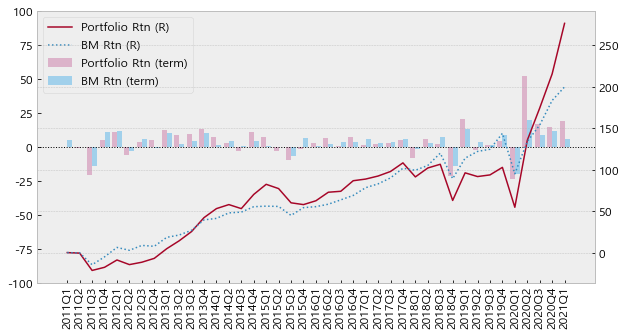

In [6]:
fs.draw_return(df)